In [38]:
#!pip install qiskit ipywidgets

In [39]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

circuit = QuantumCircuit(2)
circuit.cx(0, 1)

print('Little endian:') # QISKIT
print(Operator(circuit))

print('Big endian:') # Textbooks
print(Operator(circuit.reverse_bits()))

Little endian:
Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
Big endian:
Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [40]:
from qiskit import QuantumCircuit
from qiskit import *
from qiskit.quantum_info import *
from qiskit.visualization import *
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

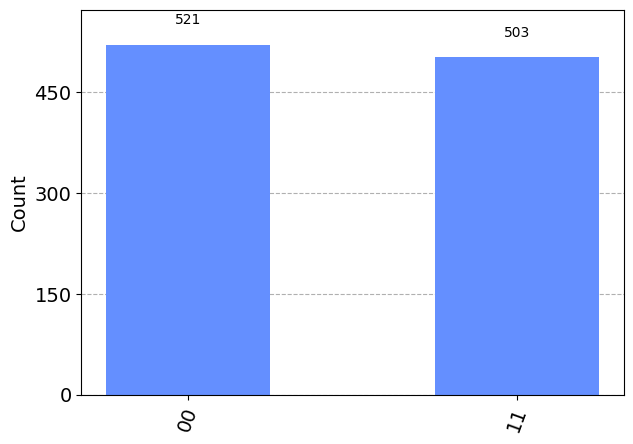

In [41]:
counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024).result().get_counts()
plot_histogram(counts)

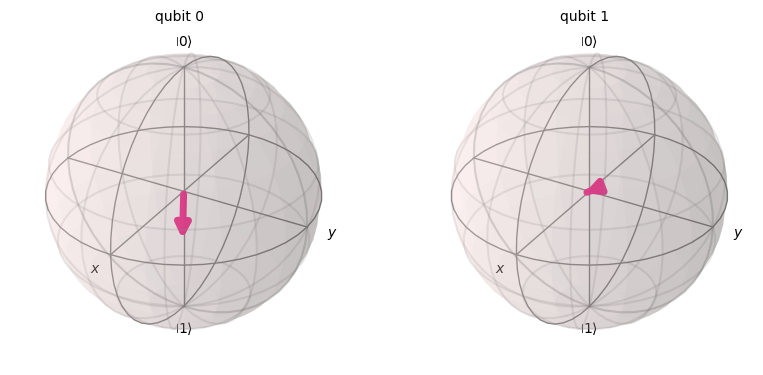

In [42]:
from qiskit.visualization import plot_bloch_multivector
rand_sv  = random_statevector(4).data
plot_bloch_multivector(rand_sv)

In [43]:
# Useful gate: controlled SWAP

# It swaps q1 and q2, if q0 (control) is high
# So |100> -> |100> and |101> -> |011>

from qiskit import *
from qiskit.quantum_info import *
from qiskit.visualization import *

qc = QuantumCircuit(3)
#qc.h(0);
qc.x(0);
qc.h(2)
st = Statevector.from_instruction(qc)
st.draw('latex')

<IPython.core.display.Latex object>

In [44]:
qc.cswap(0,1,2)
st = Statevector.from_instruction(qc)
st.draw('latex')

<IPython.core.display.Latex object>

In [45]:
# Fidelity

# Fidelity

# We discussed fidelity of two states in the main text. Consider two-states given by:
# \[ \ket{\psi} = \frac{1}{2} \Big( \ket{001} + \ket{101}  - \ket{011} - \ket{111} \Big), \]
# and
# \[ \frac{1}{\sqrt{2}} \Big( \ket{000} + \ket{111}  \Big). \]
# Compute the fidelity

from qiskit import *
from qiskit.quantum_info import *
from qiskit.visualization import *
from numpy import *

qc1 = QuantumCircuit(3)
qc1.ry(1.91063,0);
qc1.ch(0,1);
qc1.cx(1,2);
qc1.cx(0,1);
qc1.x(0)
st = Statevector.from_instruction(qc1)
st.draw('latex')

<IPython.core.display.Latex object>

In [46]:
qc2 = QuantumCircuit(3)
qc2.h(0)
qc2.cx(0,1);
qc2.cx(0,2);
st = Statevector.from_instruction(qc2)
st.draw('latex')

<IPython.core.display.Latex object>

In [47]:
backend = Aer.get_backend('statevector_simulator')
sv1 = execute(qc1, backend).result().get_statevector(qc1)
sv2 = execute(qc2, backend).result().get_statevector(qc2)
print(state_fidelity(sv1, sv2))

2.678201101107227e-33
